In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras import layers
from keras.datasets import mnist

In [2]:
from pathlib import Path

root_dir = "dataset"
dir_list = [x for x in Path(root_dir).iterdir()]

labels = [x.name for x in dir_list if '.' not in x.name] 

print(dir_list)

[WindowsPath('dataset/.DS_Store'), WindowsPath('dataset/Abra'), WindowsPath('dataset/Aerodactyl'), WindowsPath('dataset/Alakazam'), WindowsPath('dataset/Arbok'), WindowsPath('dataset/Arcanine'), WindowsPath('dataset/Articuno'), WindowsPath('dataset/Beedrill'), WindowsPath('dataset/Bellsprout'), WindowsPath('dataset/Blastoise'), WindowsPath('dataset/Bulbasaur'), WindowsPath('dataset/Butterfree'), WindowsPath('dataset/Caterpie'), WindowsPath('dataset/Chansey'), WindowsPath('dataset/Charizard'), WindowsPath('dataset/Charmander'), WindowsPath('dataset/Charmeleon'), WindowsPath('dataset/Clefable'), WindowsPath('dataset/Clefairy'), WindowsPath('dataset/Cloyster'), WindowsPath('dataset/Cubone'), WindowsPath('dataset/Dewgong'), WindowsPath('dataset/Diglett'), WindowsPath('dataset/Ditto'), WindowsPath('dataset/Dodrio'), WindowsPath('dataset/Doduo'), WindowsPath('dataset/Dragonair'), WindowsPath('dataset/Dragonite'), WindowsPath('dataset/Dratini'), WindowsPath('dataset/Drowzee'), WindowsPath('da

### Looping through to get Training Images

In [3]:
from keras.preprocessing import image
image_size = (128,128)
from keras.preprocessing.image import img_to_array

In [4]:
##(X_train, y_train) filepath = "../Images/test2.png"
from keras.preprocessing import image

from keras.preprocessing import image_dataset_from_directory

images = image_dataset_from_directory(
  Path('dataset'),
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(image_size),
  batch_size=32)

val_ds = image_dataset_from_directory(
  Path('dataset'),
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(image_size),
  batch_size=32)


Found 10658 files belonging to 149 classes.
Using 8527 files for training.
Found 10658 files belonging to 149 classes.
Using 2131 files for validation.


In [81]:
class_names = images.class_names
num=len(class_names)
print(class_names)


['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidorina'

## Building Model

In [6]:
# Create an empty sequential model
model = Sequential()

In [7]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is common
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128, 128, 3)))
data_augmentation = keras.Sequential(
  [ 
      layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)



In [8]:
# Add a second, hidden layer


In [9]:
from tensorflow.keras.models import Sequential
data_augmentation = keras.Sequential(
  [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(128, 
#                                                               128,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [10]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(data_augmentation)
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation="relu", input_shape=(128,128,3)))
model.add(layers.Conv2D(128,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0

In [12]:
from keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=['accuracy'])

In [22]:
# Fit (train) the model
model.fit(images, epochs=20, validation_data=val_ds, verbose=2)

Epoch 1/20
267/267 - 357s - loss: 0.9690 - accuracy: 0.7137 - val_loss: 6.0496 - val_accuracy: 0.3548
Epoch 2/20
267/267 - 350s - loss: 0.9634 - accuracy: 0.7175 - val_loss: 6.5540 - val_accuracy: 0.3271
Epoch 3/20
267/267 - 350s - loss: 0.9704 - accuracy: 0.7106 - val_loss: 6.0873 - val_accuracy: 0.3444
Epoch 4/20
267/267 - 350s - loss: 0.9389 - accuracy: 0.7258 - val_loss: 6.4623 - val_accuracy: 0.3473
Epoch 5/20
267/267 - 351s - loss: 0.9208 - accuracy: 0.7272 - val_loss: 6.7186 - val_accuracy: 0.3369
Epoch 6/20
267/267 - 352s - loss: 0.9489 - accuracy: 0.7237 - val_loss: 6.2557 - val_accuracy: 0.3487
Epoch 7/20
267/267 - 351s - loss: 0.9521 - accuracy: 0.7248 - val_loss: 6.3473 - val_accuracy: 0.3393
Epoch 8/20
267/267 - 365s - loss: 0.9239 - accuracy: 0.7238 - val_loss: 6.4139 - val_accuracy: 0.3571
Epoch 9/20
267/267 - 396s - loss: 0.9060 - accuracy: 0.7300 - val_loss: 6.2881 - val_accuracy: 0.3510
Epoch 10/20
267/267 - 398s - loss: 0.9111 - accuracy: 0.7340 - val_loss: 6.5250 - 

In [23]:
# Save the model
model.save("pokemon_trained.h5")

In [24]:
# Load the model
from keras.models import load_model
model = load_model("pokemon_trained.h5")

## 5. Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [25]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(val_ds, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

67/67 - 22s - loss: 6.9083 - accuracy: 0.3412
Loss: 6.908335208892822, Accuracy: 0.34115439653396606


## Random Test of Code

In [26]:
# test_images, test_labels = val_ds
model.evaluate(val_ds, verbose=2)

67/67 - 22s - loss: 6.9083 - accuracy: 0.3412


[6.908333778381348, 0.34115439653396606]

In [38]:
!curl http://cdn.bulbagarden.net/upload/3/39/007Squirtle.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


122880/118816 [===============================] - 0s 1us/step
This image most likely belongs to Mankey with a 99.85 percent confidence.


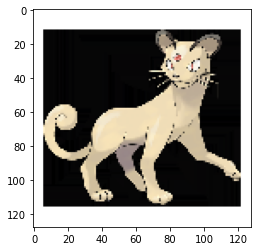

In [85]:
import matplotlib.pyplot as plt
from urllib.error import HTTPError

# https://www.clipartmax.com/png/middle/123-1236909_homerchu-homer-pikachu.png
#Path('dataset/Pidgeot/988f8c3307ca4a55a47e940681f63059.jpg')
#.jpg
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
try:
    sunflower_urls = f"https://www.serebii.net/pokemon/art/053.png"
    # print(sunflower_urls)
    # for image_ in sunflower_urls:
    sunflower_path = tf.keras.utils.get_file(str(np.random.randint(5**5)),origin=sunflower_urls)
    img = keras.preprocessing.image.load_img(
        sunflower_path, target_size=(128,128)
    )
    plt.imshow(img)
except Exception:
    pass
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# #print(img_array)